# Minimal Left Right Symmetric models with Higgs doublets

In this notebook we work the potential of MLRSM with Higgs doublets 

In [1]:
from sympy import symbols, init_printing, Matrix, I, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Bidoublet

In [2]:
phi1p = symbols(r'{{\phi_1^+}}')
phi2p = symbols(r'{{\phi_2^+}}')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

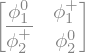

In [3]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

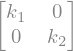

In [4]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
sqrt2 = sqrt(2)
vevPhi = {phi10:k1, phi20:k2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

### Doublets

In [5]:
chiL0 = symbols(r'\chi_L^0')
chiR0 = symbols(r'\chi_R^0')

chiLp = symbols(r'{{\chi_L^+}}')
chiRp = symbols(r'{{\chi_R^+}}')

In [6]:
ChiL = Matrix(
    [
        [chiLp],
        [chiL0]
    ]
)

ChiR = Matrix(
    [
        [chiRp],
        [chiR0]
    ]
)

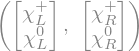

In [7]:
ChiL, ChiR

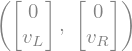

In [8]:
vL, vR = symbols(r'v_L, v_R', positive=True)
vevL = {chiL0:vL, chiLp:0}
vevR = {chiR0:vR, chiRp:0}
ChiL.subs(vevL), ChiR.subs(vevR)

## Scalar potential

In [9]:
from sympy.physics.quantum import Dagger
from sympy import solve

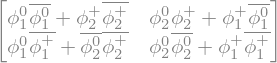

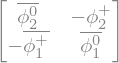

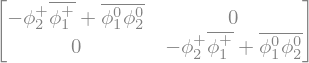

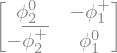

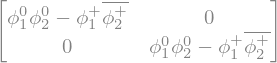

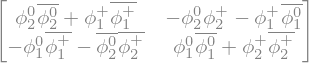

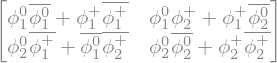

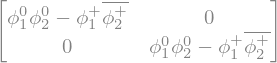

In [10]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildeDagger = Dagger(Phitilde)
PhiDaggerPhitilde = PhiDagger*Phitilde
display(PhiDaggerPhitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhitildeDaggerPhitilde = PhitildeDagger*Phitilde
display(PhitildeDaggerPhitilde)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

In [11]:
ChiLDagger = Dagger(ChiL)
ChiRDagger = Dagger(ChiR)

ChiLDaggerChiL = (ChiLDagger*ChiL)[0]
display(ChiLDaggerChiL)
ChiRDaggerChiR = (ChiRDagger*ChiR)[0]
display(ChiRDaggerChiR)

In [12]:
mu12, mu22 = symbols(r'\mu_1^2, \mu_2^2', real=True)
lamb1, lamb2, lamb3, lamb4, lamb5, lamb6 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5, \lambda_6', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
rho1, rho2,= symbols(r'\rho_1, \rho_2', real=True)


In [13]:
#conjugate(trace(PhiDaggerPhitilde*PhiDaggerPhitilde))

In [14]:
#trace(PhitildeDaggerPhi*PhitildeDaggerPhi)

In [15]:
V = (
    - mu12*trace(PhiDaggerPhi)
    + lamb1*trace(PhiDaggerPhi)**2
    + lamb2*trace(PhiDaggerPhi*PhiDaggerPhi)
    + lamb3/2*(trace(PhiDaggerPhitilde) + trace(PhitildeDaggerPhi))**2
    + lamb4/2*(trace(PhiDaggerPhitilde) - trace(PhitildeDaggerPhi))**2
    + lamb5*trace(PhiDaggerPhi*PhitildeDaggerPhitilde)
    + lamb6/2*(trace(PhiDaggerPhitilde*PhiDaggerPhitilde) + conjugate(trace(PhiDaggerPhitilde*PhiDaggerPhitilde)))
    - mu22*(ChiLDaggerChiL + ChiRDaggerChiR)
    + rho1*(ChiLDaggerChiL**2 + ChiRDaggerChiR**2)
    + rho2*(ChiLDaggerChiL*ChiRDaggerChiR)
    + alpha1*trace(PhiDaggerPhi)*(ChiLDaggerChiL + ChiRDaggerChiR)
    + alpha2*(
        ChiLDagger*Phi*PhiDagger*ChiL
        + ChiRDagger*PhiDagger*Phi*ChiR
    )[0]
    + alpha3*(
        ChiLDagger*Phitilde*PhitildeDagger*ChiL
        + ChiRDagger*PhitildeDagger*Phitilde*ChiR
    )[0]
)

In [16]:
vevR

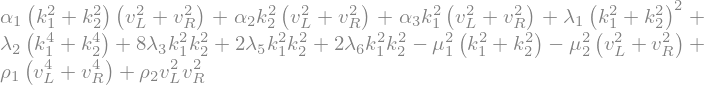

In [17]:
VLRPhi_vev = V.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

### Tadpole conditions

In [18]:
scalar_vevs = [k1, k2, vL, vR]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).factor()

In [19]:
for muij, tadpole in tadpoles_relations.items():
    display(muij)
    tadpole_simplified = tadpole.collect([k1, k2, vL, vR], factor)
    display(tadpole_simplified)

In [20]:
tadpoles_relations[k1]

In [21]:
tadpoles_relations[vR].subs(k2,0).subs(vL, 0)

In [22]:
tadpole12_sol = solve([tadpoles_relations[k1], tadpoles_relations[vR]], [mu12, mu22], dict=True)[0]
tadpole12_sol

In [23]:
tadpoles_relations_simplified = {}
for muij, tadpole in tadpole12_sol.items():
    display(muij)
    tadpole_simplified = tadpole.collect([k1, k2, vL, vR], factor).subs(k2,0).subs(vL, 0) # remove vL and vR
    display(tadpole_simplified)
    tadpoles_relations_simplified[muij] = tadpole_simplified

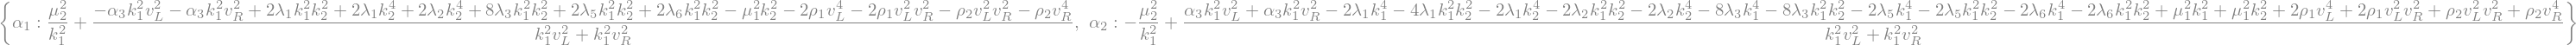

In [24]:
tadpole12_sol_2L = solve([tadpoles_relations[k2], tadpoles_relations[vL]], [alpha1, alpha2, mu22], dict=True)[0]
tadpole12_sol_2L

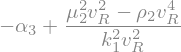

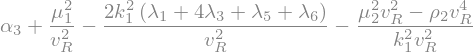

In [25]:
tadpoles_relations_simplified_2L = {}
for muij, tadpole in tadpole12_sol_2L.items():
    display(muij)
    tadpole_simplified = tadpole.expand().collect([k1, k2, vL, vR], factor).subs(k2,0).subs(vL, 0)
    display(tadpole_simplified)
    tadpoles_relations_simplified_2L[muij] = tadpole_simplified

## Mass matrices

In [26]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
chiR0r, chiR0i = symbols(r'\chi_R^{0r}, \chi_R^{0i}', real=True)
chiL0r, chiL0i = symbols(r'\chi_L^{0r}, \chi_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (k1 + phi10r + I*phi10i),
    phi20: (k2 + phi20r + I*phi20i),
    chiR0: (vR + chiR0r + I*chiR0i),
    chiL0: (vL + chiL0r + I*chiL0i)
}

In [27]:
VLRPhi_ri = V.subs(complex_scalar_fields)

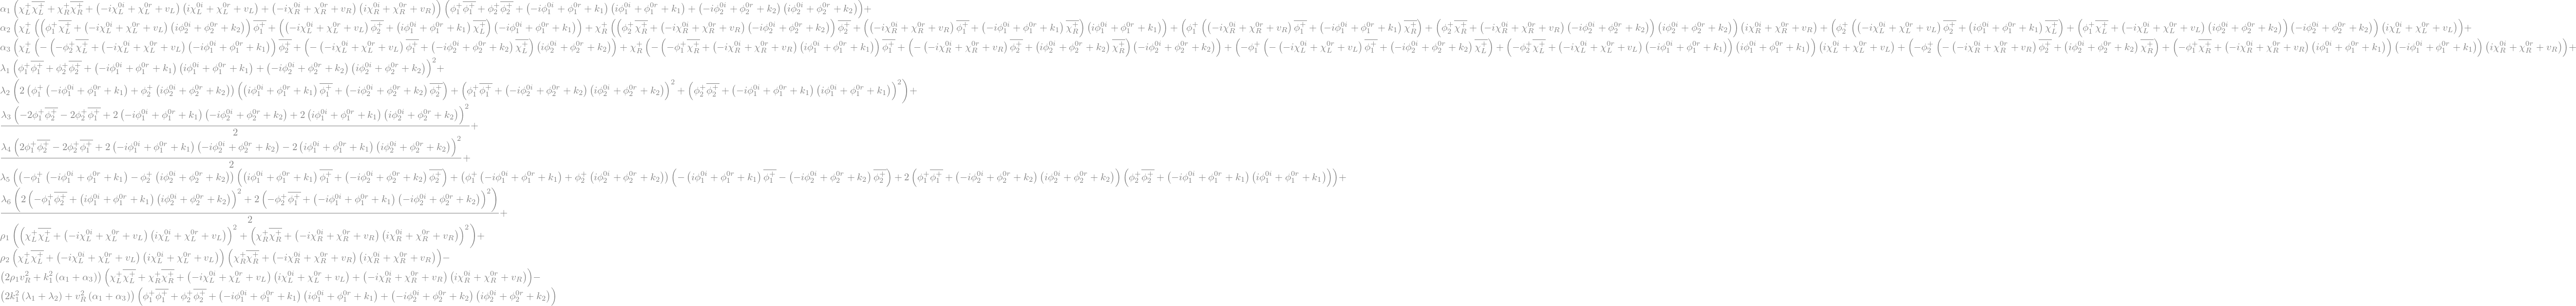

In [28]:
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpoles_relations_simplified)
VLRPhi_ri_tadpole_caso1

In [29]:
vevPhi[phi10r] = 0#vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = 0#vevPhi[phi20]
vevPhi[phi20i] = 0

In [30]:
vevL[chiL0r] = 0#vevL[deltaL0]
vevL[chiL0i] = 0
vevR[chiR0r] = 0#vevR[deltaR0]
vevR[chiR0i] = 0

In [31]:
from sympy import derive_by_array

In [32]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

### Charged scalar mass matrix

In [33]:
from sympy import Dummy

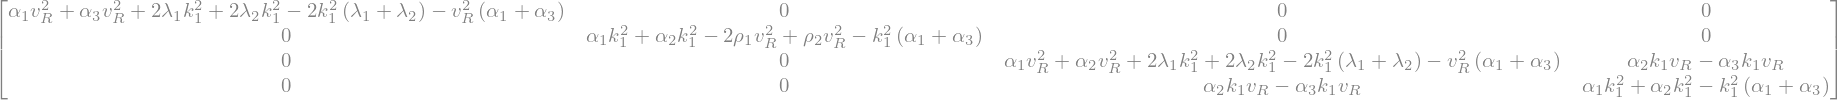

In [34]:
phip_fields = [phi2p, chiLp, phi1p, chiRp]

dummyconjugate1p = Dummy(r'\phi_1^{+,d}')
dummyconjugate2p = Dummy(r'\phi_2^{+,d}')
dummyconjugateRp = Dummy(r'\chi_R^{+,d}')
dummyconjugateLp = Dummy(r'\chi_L^{+,d}')

dummychangep = {
    conjugate(phi1p):dummyconjugate1p,
    conjugate(phi2p):dummyconjugate2p,
    conjugate(chiRp):dummyconjugateRp,
    conjugate(chiLp):dummyconjugateLp
}
phim_fields = [dummyconjugate2p, dummyconjugateLp, dummyconjugate1p, dummyconjugateRp] 
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
Mp_square

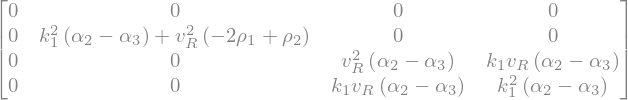

In [35]:
Mp_square = Mp_square.applyfunc(lambda x:x.collect([k1, vR], factor)).tomatrix()
Mp_square

In [36]:
from sympy import eye

In [37]:
z = symbols('z')
poly_p = (Mp_square - z*eye(4)).det()
eigenvals_p = solve(poly_p.expand().factor(), z, dict=True)

In [38]:
eigenvals_p

In [39]:
x1, x2, x3, x4 = symbols('x_1, x_2, x_3, x_4')
x = Matrix(
    [
        [x1],
        [x2],
        [x3],
        [x4]
    ]
)

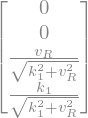

In [40]:
eigevector_sol3 = solve((Mp_square - eigenvals_p[1][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
#eigevector_sol1
eigevector3 = x.subs(eigevector_sol3).subs(x4,1)
eigevector3 = (eigevector3/eigevector3.norm()).applyfunc(factor)
eigevector3

In [41]:
eigevector_sol2 = solve((Mp_square - eigenvals_p[2][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
eigevector_sol2


In [42]:
eigevector2 = x.subs(eigevector_sol2).subs(x2,1)
eigevector2 = (eigevector2/eigevector2.norm()).applyfunc(factor)
eigevector2

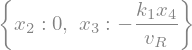

In [43]:
eigevector_sol4 = solve((Mp_square - eigenvals_p[0][z]*eye(4)).applyfunc(factor)*x, [x1, x2, x3, x4], dict=True)[0]
eigevector_sol4

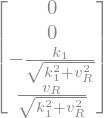

In [44]:
eigevector4 = x.subs(eigevector_sol4).subs(x4,1).subs(x1,0)
eigevector4 = (eigevector4/eigevector4.norm()).applyfunc(factor)
eigevector4

In [45]:
eigevector_sol1 = solve([x.dot(eigevector2), x.dot(eigevector3), x.dot(eigevector4)], [x1, x2, x3, x4] , dict=True)[0]
eigevector_sol1

In [46]:
eigevector1 = x.subs(eigevector_sol1).subs(x1,1)
eigevector1 = (eigevector1/eigevector1.norm()).applyfunc(factor)
eigevector1

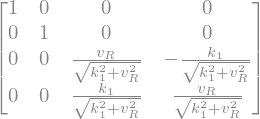

In [47]:
Pp = Matrix.hstack(eigevector1, eigevector2, eigevector3, eigevector4)
Pp

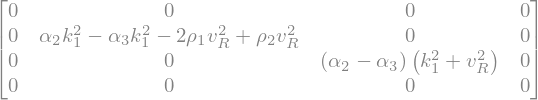

In [48]:
Dp = (Pp.T*Mp_square*Pp).applyfunc(factor)
Dp

In [49]:
Ppinv = Pp.T

In [50]:
Ppinv = Ppinv.applyfunc(lambda x:x.collect([k1, vR], factor))

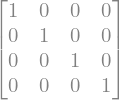

In [51]:
(Pp*Ppinv).applyfunc(factor)

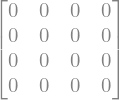

In [52]:
((Pp*Dp*Ppinv).applyfunc(factor) - Mp_square).applyfunc(factor)

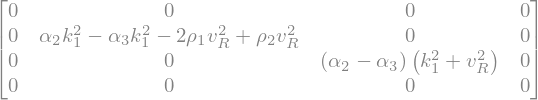

In [53]:
(Ppinv*Mp_square*Pp).applyfunc(factor)

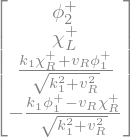

In [54]:
physical_charged_scalars = (Ppinv*Matrix(phip_fields)).applyfunc(factor)
physical_charged_scalars

Pp

In [55]:
from sympy import Eq

In [56]:
GRp = symbols(r'{{G_R^+}}')
HRp = symbols(r'{{H_R^+}}')
eqHRp = Eq(HRp, physical_charged_scalars[2])
eqGRp = Eq(GRp, physical_charged_scalars[3])

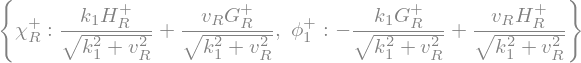

In [57]:
change_charged_higgs = solve([eqGRp, eqHRp], [phi1p, chiRp])
change_charged_higgs

In [58]:
GLp = symbols(r'{{G_L^+}}')
HLp = symbols(r'{{H_L^+}}')
change_charged_higgs[phi2p] = GLp
change_charged_higgs[chiLp] = HLp

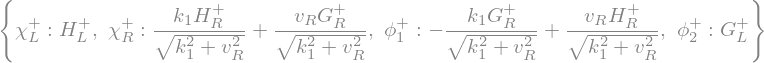

In [59]:
change_charged_higgs

In [60]:
VLRPhi_ri_tadpole_caso1_physical = VLRPhi_ri_tadpole_caso1.subs(change_charged_higgs)

In [61]:
vev_physical_charged_scalars = {
    GLp:0, GRp:0, HLp:0, HRp:0
}

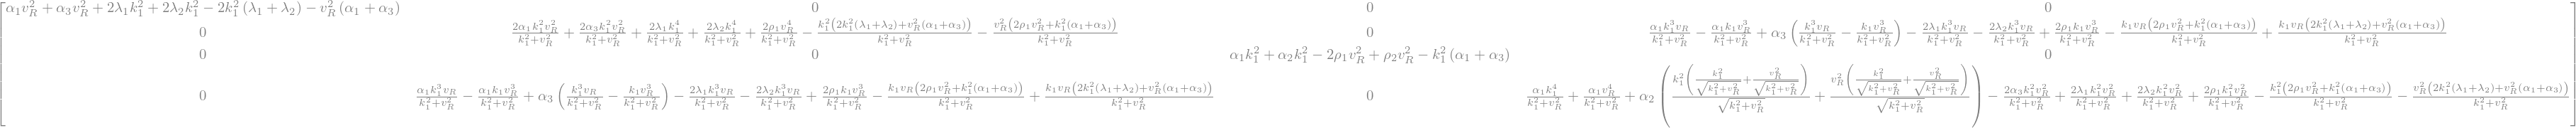

In [62]:
phip_fields = [GLp, GRp, HLp, HRp]

dummyconjugateGLp = Dummy(r'G_L^{+,d}')
dummyconjugateGRp = Dummy(r'G_R^{+,d}')
dummyconjugateHRp = Dummy(r'H_R^{+,d}')
dummyconjugateHLp = Dummy(r'H_L^{+,d}')

dummychangep = {
    conjugate(GLp):dummyconjugateGLp,
    conjugate(GRp):dummyconjugateGRp,
    conjugate(HRp):dummyconjugateHRp,
    conjugate(HLp):dummyconjugateHLp
}
phim_fields = [dummyconjugateGLp, dummyconjugateGRp, dummyconjugateHLp, dummyconjugateHRp] 
Mp_square_physical = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1_physical.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0).subs(vev_physical_charged_scalars)
Mp_square_physical

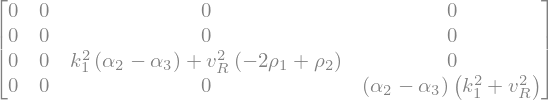

In [63]:
Mp_square_physical = Mp_square_physical.applyfunc(factor).applyfunc(lambda x:x.collect([k1, vR], factor))
Mp_square_physical

In [64]:
mHL, mHR = symbols('m_{H_L^+}, m_{H_R^+}', positive=True)

In [65]:

alpha12_rho12_masses_relations = solve(
    [
        mHL**2 - Mp_square_physical[2,2],
        mHR**2 - Mp_square_physical[3,3]
    ],
    [alpha2-alpha3, rho2-2*rho1], dict=True
)[0]

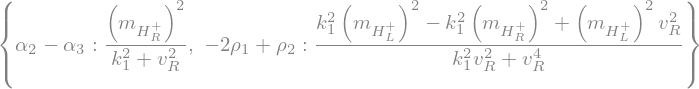

In [66]:
alpha12_rho12_masses_relations

In [67]:
for param, exp in alpha12_rho12_masses_relations.items():
    exp_factor = exp.factor()
    #display(exp_factor)
    alpha12_rho12_masses_relations[param] = exp_factor

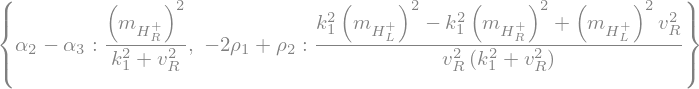

In [68]:
alpha12_rho12_masses_relations

### Neutral mass matrix

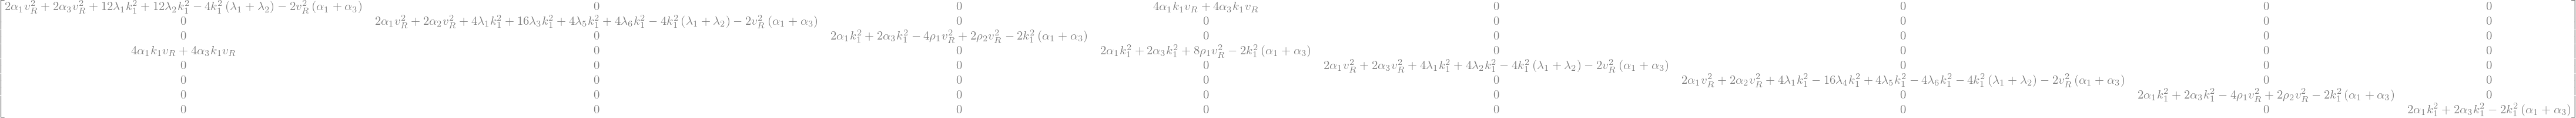

In [69]:
phir_fields = [phi10r, phi20r, chiL0r, chiR0r]
phii_fields = [phi10i, phi20i, chiL0i, chiR0i]
phiri_fields = phir_fields + phii_fields

MRI_square = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phiri_fields, phiri_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
MRI_square

### Pseudocalar and goldstone

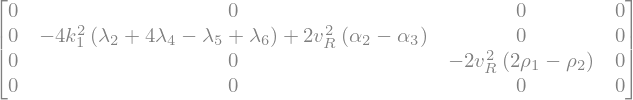

In [70]:
Mii = MRI_square[4:, 4:].applyfunc(lambda x:x.collect([k1, vR], factor))
Mii

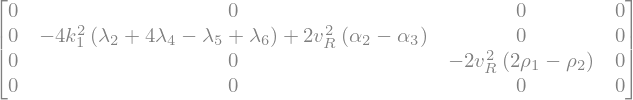

In [71]:
Mii

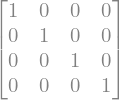

In [72]:
Pii = Matrix(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)
Pii

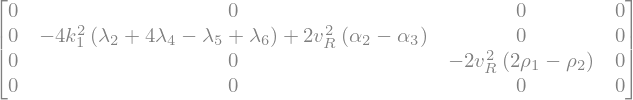

In [73]:
Dii = (Pii.T*Mii*Pii)
Dii

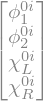

In [74]:
physical_pseudo_scalars = (Pii.T*Matrix(phii_fields)).applyfunc(factor)
physical_pseudo_scalars

In [75]:
A10 = symbols(r'{{A_1^0}}')
A20 = symbols(r'{{A_2^0}}')
GZ = symbols(r'{{G_Z}}')
GX = symbols(r'{{G_X}}')
eqA10 = Eq(A10, physical_pseudo_scalars[1])
eqA20 = Eq(A20, physical_pseudo_scalars[2])
eqGZ = Eq(GZ, physical_pseudo_scalars[0])
eqGX = Eq(GX, physical_pseudo_scalars[3])

In [76]:
change_pseudo_scalars = solve([eqA10, eqA20, eqGZ, eqGX], [chiL0i, chiR0i, phi10i, phi20i])
change_pseudo_scalars

In [77]:
mA10, mA20 = symbols('m_{A_1^0}, m_{A_2^0}', positive=True)
lamb2456 = lamb2 + 4*lamb4 - lamb5 + lamb6
lambdas2456_masses_relations = solve(
    [
        mA10**2 - Dii[1,1]
    ],
    [lamb2456], dict=True
)[0]

In [78]:
lambdas2456_masses_relations[lamb2456] = lambdas2456_masses_relations[lamb2456].factor()

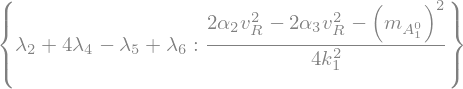

In [79]:
lambdas2456_masses_relations

In [80]:
rho12_relations = solve(
    [
        mA20**2 - Dii[2,2]
    ],
    [-2*rho1 + rho2], dict=True
)[0]

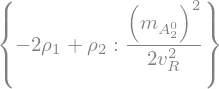

In [81]:
rho12_relations

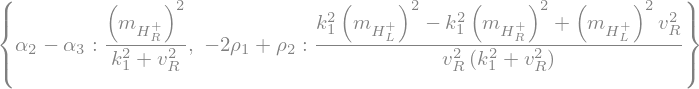

In [82]:
alpha12_rho12_masses_relations

### Scalars

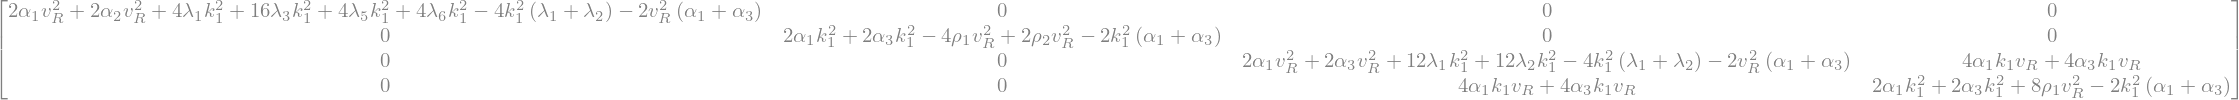

In [83]:
phir_fields = [phi20r, chiL0r, phi10r, chiR0r]

Mrr = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phir_fields, phir_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2,0).subs(vL, 0)
Mrr

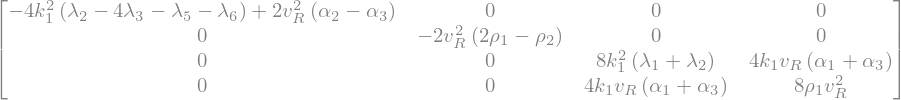

In [84]:
Mrr = Mrr.applyfunc(lambda x:x.collect([k1, vR], factor))
Mrr

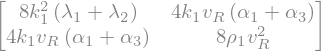

In [330]:
mrr_mix = Matrix(
    [
        [Mrr[2,2], Mrr[2,3]],
        [Mrr[3,2], Mrr[3,3]]
    ]
)
mrr_mix

In [295]:
from sympy import sin, cos, tan
th = symbols(r'\theta')

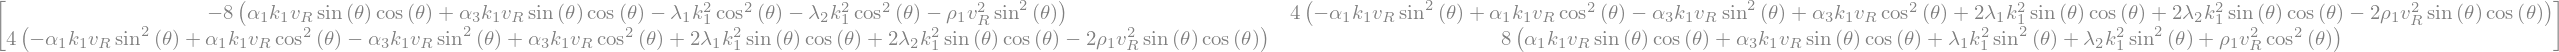

In [332]:
Oth = Matrix(
    [
        [cos(th), sin(th)],
        [-sin(th), cos(th)]
    ]
)

mrr_mix_rotate = (Oth.T*mrr_mix*Oth).applyfunc(factor)
mrr_mix_rotate

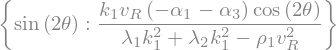

In [336]:
sin2th_sol = solve(mrr_mix_rotate[0,1].trigsimp(), sin(2*th), dict=True)[0]
sin2th_sol

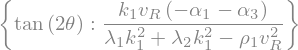

In [337]:
tan2th_sol = {tan(2*th): (sin(2*th)/cos(2*th)).subs(sin2th_sol)}
tan2th_sol

In [338]:
from sympy import series
epsilon = symbols(r'\epasilon')

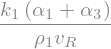

In [339]:
tan2th_approx = series(tan2th_sol[tan(2*th)].subs(k1, epsilon*vR), x=epsilon, x0=0, n=2).removeO().factor().subs(epsilon, k1/vR)
tan2th_approx

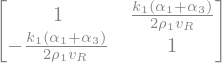

In [340]:
Oth_approx = Oth.subs(sin(th), tan2th_approx/2).subs(cos(th), 1)
Oth_approx


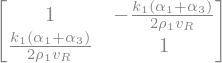

In [341]:
Oth_approx_inv = (Oth.T).subs(sin(th), tan2th_approx/2).subs(cos(th), 1)
Oth_approx_inv

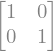

In [346]:
(Oth_approx_inv*Oth_approx).subs(k1, epsilon*vR).subs(epsilon, 0)

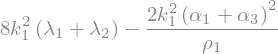

In [356]:
mH10_square = mrr_mix_rotate[0,0].subs(sin(th), tan2th_approx/2).subs(cos(th), 1).expand().collect(rho1, factor)
mH10_square

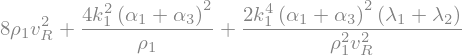

In [357]:
mH20_square = mrr_mix_rotate[1,1].subs(sin(th), tan2th_approx/2).subs(cos(th), 1).expand().collect(rho1, factor)
mH20_square

In [373]:
mH10, mH20, mH30, mH40 = symbols('m_{H_1^0}, m_{H_2^0}, m_{H_3^0}, m_{H_4^0}', positive=True)

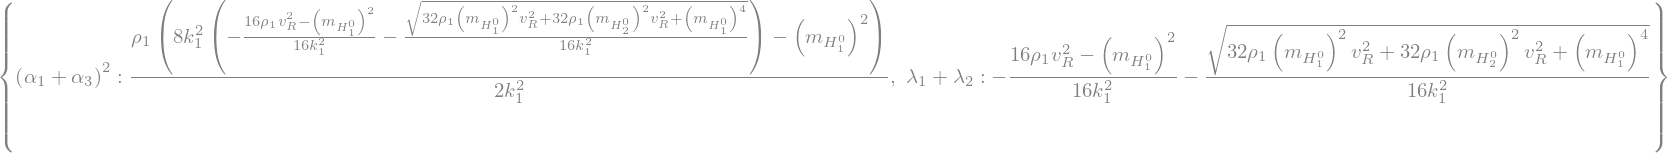

In [374]:
alpha13_lamb12_sol = solve(
    [
        Eq(mH10_square, mH10**2),
        Eq(mH20_square, mH20**2)
    ], 
    [(alpha1 + alpha3)**2, lamb1 + lamb2], dict=True
)[0]
alpha13_lamb12_sol

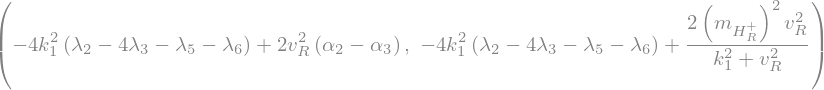

In [365]:
mH30_square = Mrr[0,0]
mH30_square, mH30_square.subs(alpha12_rho12_masses_relations)

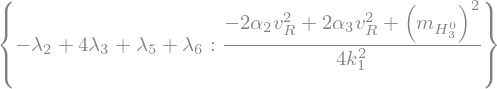

In [375]:
lamb2356_sol = solve(Eq(mH30_square, mH30**2), - lamb2 + 4*lamb3 + lamb5 + lamb6, dict=True)[0]
lamb2356_sol

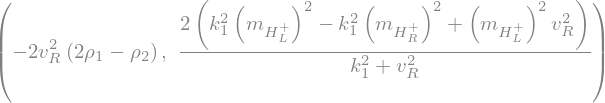

In [366]:
mH40_square = Mrr[1,1]
mH40_square, mH40_square.subs(alpha12_rho12_masses_relations)

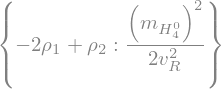

In [376]:
rho21_neutral_sol = solve(Eq(mH40_square, mH40**2), rho2 - 2*rho1, dict=True)[0]
rho21_neutral_sol

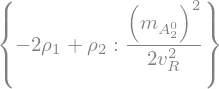

In [377]:
rho12_relations

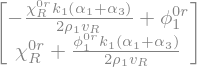

In [378]:
physical_scalars = Oth_approx_inv*Matrix(
    [
        [phi10r],
        [chiR0r]
    ]
)
physical_scalars

In [379]:
H10 = symbols(r'{{H_1^0}}')
H20 = symbols(r'{{H_2^0}}')
H30 = symbols(r'{{H_3^0}}')
H40 = symbols(r'{{H_4^0}}')
eqH10 = Eq(H10, physical_scalars[0])
eqH20 = Eq(H20, physical_scalars[1])
eqH30 = Eq(H30, phi20r)
eqH40 = Eq(H40, chiL0r)


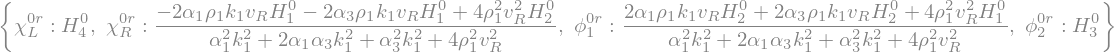

In [380]:
change_scalars = solve([eqH10, eqH20, eqH30, eqH40], [chiL0r, chiR0r, phi10r, phi20r], dict=True)[0]
change_scalars

In [383]:
for key, value in change_scalars.items():
    change_scalars[key] = value.factor(deep=True)

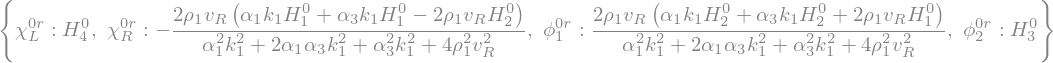

In [384]:
change_scalars

In [385]:
change_scalar_fields = {
    **change_scalars,
    **change_pseudo_scalars,
    **change_charged_higgs
}

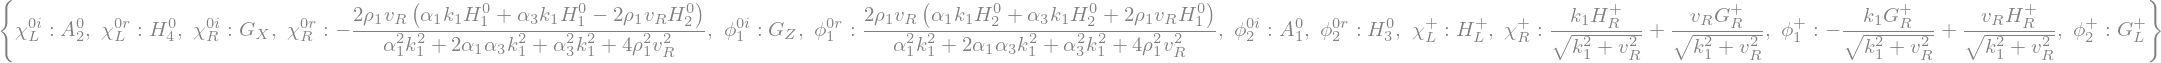

In [386]:
change_scalar_fields